In [316]:
#Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans

In [317]:
data = pd.read_csv('iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [318]:
x = data.drop('class', axis=1)
y = data['class']

In [319]:
y = pd.get_dummies(y)
y.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


In [320]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [321]:
scaler = preprocessing.StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
print(x_train_scaled[:5])

[[ 1.06108058 -1.28226436  1.17828908  0.79565402]
 [-1.55272496  0.78466924 -1.35587236 -1.18522736]
 [ 1.18554751 -0.5932865   0.6023433   0.26741899]
 [ 1.68341523  1.24398781  1.35107281  1.72006533]
 [-0.43252258 -1.28226436  0.14158667  0.13536023]]


In [322]:
x_test_scale = scaler.transform(x_test)

We Wanna do KNN as classification

In [323]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [324]:
y_pred = knn.predict(x_test_scale)

In [325]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


In [326]:
# choose our parameters for gridsearch
parameters = {"n_neighbors" : range(1,51) , "weights" : ["uniform" ,"distance"]}
grid_search = model_selection.GridSearchCV(estimator = KNeighborsClassifier(),
                                          param_grid = parameters,
                                          scoring = "accuracy")
# fit the data
grid_search.fit(x_train_scaled , y_train)
#show the best parameters
grid_search.best_params_

{'n_neighbors': 7, 'weights': 'distance'}

In [327]:
#Let's make the model again after using gridsearch
knn = KNeighborsClassifier(n_neighbors=11, weights='uniform')
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=11)

In [328]:
y_pred = knn.predict(x_test_scale)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


As you can see, there is a small change in enhancing the approach

In [329]:
scaler2 = preprocessing.StandardScaler()
x_scale = scaler2.fit_transform(x)

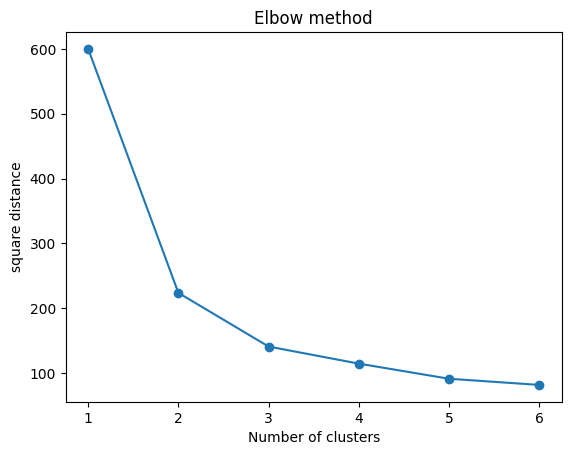

In [330]:
square_distance = []
for i in range(6):
    kmeans = KMeans(n_clusters=i+1, n_init=10, max_iter=100, random_state=42)
    kmeans.fit(x_scale)
    square_distance.append(kmeans.inertia_)

plt.plot(range(1,7), square_distance, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('square distance')
plt.show()

Based on the Elbow method, chosing 3 cluster is the best option. Also, it is understandable, since we have 3 types of flowers.

In [337]:
alpha = 0.01
tetha = 0
z1 = np.zeros((1, 8))
z2 = np.zeros((1, 5))
z3 = np.zeros((1, 3))
w1 = np.ones((4, 8))
w2 = np.ones((8, 5))
w3 = np.ones((5, 3))
b1 = np.ones((1, 8))
b2 = np.ones((1, 5))
b3 = np.ones((1, 3))

In [332]:
def relu(x):
    return np.maximum(0, x)

In [333]:
def relu_derivative(z):
    return (z > 0).astype(float)

In [334]:
def softmax(z):
    # z: shape (batch_size, num_classes)
    exp_values = np.exp(z - np.max(z, axis=1, keepdims=True))  # stability fix
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    return probabilities

In [338]:
for i in range(10000):
    # Forward pass
    z1 = x_train_scaled @ w1 + b1
    A1 = relu(z1)

    z2 = A1 @ w2 + b2
    A2 = relu(z2)

    z3 = A2 @ w3 + b3
    Y = softmax(z3)

    # Backward pass
    m = x_train_scaled.shape[0]

    dz3 = Y - y_train.to_numpy()  # ONLY this one needs to be converted
    dw3 = (A2.T @ dz3) * (1/m)
    db3 = (1/m) * np.sum(dz3, axis=0, keepdims=True)

    dA2 = dz3 @ w3.T
    dz2 = dA2 * relu_derivative(z2)
    dw2 = 1/m * (A1.T @ dz2)
    db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True)

    dA1 = dz2 @ w2.T
    dz1 = dA1 * relu_derivative(z1)
    dw1 = 1/m * (x_train_scaled.T @ dz1)
    db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True)

    # Update weights
    w3 -= alpha * dw3
    b3 -= alpha * db3
    w2 -= alpha * dw2
    b2 -= alpha * db2
    w1 -= alpha * dw1
    b1 -= alpha * db1


In [339]:
z1 = x_test_scale @ w1 + b1
A1 = relu(z1)

z2 = A1 @ w2 + b2
A2 = relu(z2)

z3 = A2 @ w3 + b3
Y = softmax(z3)

true_labels = np.argmax(y_test, axis=1)
predictions = np.argmax(Y, axis=1)
accuracy = np.mean(predictions == true_labels)
print("Accuracy: ", accuracy)

Accuracy:  0.9666666666666667
